# baseline v3

Ïù¥ Î≤†Ïù¥Ïä§ÎùºÏù∏ ÏΩîÎìúÎäî `ÏÇ¨Ï†ÑÌïôÏäµ Î™®Îç∏ Î°úÎìú`, `Î∞∞Ïπò ÌïôÏäµ`, `ÌååÏù∏ÌäúÎãù`, `ÏñëÏûêÌôî`, `PEFT` Îì±Ïù¥ Ï†ÅÏö©Îêú Î≤ÑÏ†ÑÏûÖÎãàÎã§.

ColabÏùò GPU ÌôòÍ≤ΩÏóêÏÑú Í∞úÎ∞úÎêòÏóàÏäµÎãàÎã§.
- Îü∞ÌÉÄÏûÑ - Îü∞ÌÉÄÏûÑ Ïú†Ìòï Î≥ÄÍ≤Ω - GPUÎ°ú Î≥ÄÍ≤Ω(T4 GPU Îì±)



# 1. ÌôòÍ≤Ω Ï§ÄÎπÑ

Í∞úÎ∞ú ÌôòÍ≤ΩÏóê ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Î≤ÑÏ†ÑÏùÑ Í≥†Ï†ïÌïòÍ≥† ÏµúÏã† Î≤ÑÏ†ÑÏúºÎ°ú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏóÖÎç∞Ïù¥Ìä∏Ìï©ÎãàÎã§.

- ÏïÑÎûò ÏÖÄ Ïã§Ìñâ
- Ïã§Ìñâ ÏôÑÎ£å ÌõÑ Îü∞ÌÉÄÏûÑ - ÏÑ∏ÏÖò Îã§Ïãú ÏãúÏûë

In [1]:
# !pip uninstall torch -y

In [2]:
# Í∑∏ Îã§Ïùå Îã§Ïãú ÏÑ§Ïπò
!pip install -U "Pillow<12.0,>=9.0" "git+https://github.com/huggingface/transformers" "accelerate>=0.34.2" \
  "peft>=0.13.2" "bitsandbytes>=0.43.1" datasets pandas torch==2.8.0 torchvision

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-ypmu_yau
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-ypmu_yau
  Resolved https://github.com/huggingface/transformers to commit 77e8b9f8dfc8e736ad2f603a5b2ae2b1076ed271
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 91.2/91.2 kB 7.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 502.0/502.0 kB 42.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [3]:
# PyTorch (CUDA 12.1)
# !pip install --upgrade --index-url https://download.pytorch.org/whl/cu121 \
#   torch torchvision torchaudio

In [4]:
# Î™®Îç∏/Î°úÎçî ÌïÑÏàò
# !pip install --upgrade unsloth bitsandbytes transformers accelerate datasets pandas Pillow

In [5]:
# # 1. pip ÏûêÏ≤¥Î•º ÏµúÏã† Î≤ÑÏ†ÑÏúºÎ°ú ÏóÖÍ∑∏Î†àÏù¥Îìú
# !pip install -U pip

# # 2. (ÌïµÏã¨) Unsloth ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò
# # ÎÖ∏Ìä∏Î∂ÅÏóêÏÑúÎäî CUDA 12.1Í≥º PyTorch 2.4.0 ÌôòÍ≤ΩÏóê ÏµúÏ†ÅÌôîÎêú Î≤ÑÏ†ÑÏùÑ ÏÑ§ÏπòÌï©ÎãàÎã§.
# !pip install -U "unsloth[cu121-torch240] @ git+https://github.com/unslothai/unsloth.git"

# # 3. ÎÇòÎ®∏ÏßÄ ÏùòÏ°¥ÏÑ± Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò
# !pip install -U "transformers>=4.57.0" "peft" "bitsandbytes" "accelerate" \
#   "datasets" "pandas" "Pillow<12.0,>=9.0"

In [6]:
# (ÌïµÏã¨) unslothÎ•º git main Î∏åÎûúÏπòÏóêÏÑú ÏÑ§ÏπòÌï©ÎãàÎã§.
# !pip install -U "unsloth[cu121-torch240] @ git+https://github.com/unslothai/unsloth.git"

In [7]:
# # ÎÇòÎ®∏ÏßÄ Ìå®ÌÇ§ÏßÄÎ•º ÏµúÏã† Î≤ÑÏ†ÑÏúºÎ°ú ÏÑ§ÏπòÌï©ÎãàÎã§.
# !pip install -U "transformers>=4.57.0" "peft" "bitsandbytes" "accelerate" \
#   "datasets" "pandas" "Pillow<12.0,>=9.0"

In [8]:
# !pip -q install "Pillow<12.0,>=9.0" "transformers>=4.44.2" "accelerate>=0.34.2" "peft>=0.13.2" "bitsandbytes>=0.43.1" datasets pandas torch torchvision --upgrade

# 2. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

Í∞úÎ∞úÏóê ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞Î•º Ï§ÄÎπÑÌï©ÎãàÎã§.

- train.csv, train Ìè¥Îçî
- test.csv, test Ìè¥Îçî
- sample_submission.csv

Î≥∏ Î≤†Ïù¥Ïä§ÎùºÏù∏ÏùÄ colabÏóêÏÑú Íµ¨Í∏Ä ÎìúÎùºÏù¥Î∏åÎ•º ÎßàÏö¥Ìä∏ÌïòÏó¨ ÏÇ¨Ïö©Ìï©ÎãàÎã§.

Îç∞Ïù¥ÌÑ∞Î•º ÏïïÏ∂ï Ìï¥Ï†úÌïòÎäîÎç∞ Î™á Î∂Ñ Ï†ïÎèÑÏùò ÏãúÍ∞ÑÏù¥ ÏÜåÏöîÎê©ÎãàÎã§.

#### Ïã§Ïäµ Ï∞∏Í≥† ÎÇ¥Ïö©

    Ï±ïÌÑ∞ 2-2 Ìï©ÏÑ± Îç∞Ïù¥ÌÑ∞ Ïã§Ïäµ
    - Íµ¨Í∏Ä ÎìúÎùºÏù¥Î∏å ÎßàÏö¥Ìä∏ : drive()

In [9]:
# # Íµ¨Í∏ÄÎìúÎùºÏù¥Î∏å ÎßàÏö¥Ìä∏
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# ÏïïÏ∂ï Ìï¥Ï†ú
!unzip "/content/drive/My Drive/SSAFY/A123/2025-ssafy-14" -d "/content/"

Ïä§Ìä∏Î¶¨Î∞ç Ï∂úÎ†• ÎÇ¥Ïö©Ïù¥ Í∏∏Ïñ¥ÏÑú ÎßàÏßÄÎßâ 5000Ï§ÑÏù¥ ÏÇ≠Ï†úÎêòÏóàÏäµÎãàÎã§.
  inflating: /content/test/test_2776.jpg  
  inflating: /content/test/test_2777.jpg  
  inflating: /content/test/test_2778.jpg  
  inflating: /content/test/test_2779.jpg  
  inflating: /content/test/test_2780.jpg  
  inflating: /content/test/test_2781.jpg  
  inflating: /content/test/test_2782.jpg  
  inflating: /content/test/test_2783.jpg  
  inflating: /content/test/test_2784.jpg  
  inflating: /content/test/test_2785.jpg  
  inflating: /content/test/test_2786.jpg  
  inflating: /content/test/test_2787.jpg  
  inflating: /content/test/test_2788.jpg  
  inflating: /content/test/test_2789.jpg  
  inflating: /content/test/test_2790.jpg  
  inflating: /content/test/test_2791.jpg  
  inflating: /content/test/test_2792.jpg  
  inflating: /content/test/test_2793.jpg  
  inflating: /content/test/test_2794.jpg  
  inflating: /content/test/test_2795.jpg  
  inflating: /content/test/test_2796.jpg  
  inflating: 

# 3. ÎùºÏù¥Î∏åÎü¨Î¶¨, Îç∞Ïù¥ÌÑ∞, ÏÑ§Ï†ï

In [11]:
# Î™®Îç∏/Î°úÎçî ÌïÑÏàò ÏÖÄ(#VSC-2ac973d1)Ïóê Ï∂îÍ∞Ä

!pip install --upgrade albumentations

In [12]:
import os, re, math, random
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from dataclasses import dataclass
import torch
from typing import Dict, List, Any
from transformers import (
    AutoModelForVision2Seq,
    AutoProcessor,
    BitsAndBytesConfig,
    get_linear_schedule_with_warmup,
    Qwen3VLForConditionalGeneration # Import the new model class
)
from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training
from tqdm import tqdm

# Ïù¥ÎØ∏ÏßÄ Î°úÎìú Ïãú ÌîΩÏÖÄ Ï†úÌïú Ìï¥Ï†ú
Image.MAX_IMAGE_PIXELS = None

# ÎîîÎ∞îÏù¥Ïä§ GPU Ïö∞ÏÑ† ÏÇ¨Ïö© ÏÑ§Ï†ï
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

# ÏÇ¨Ï†Ñ ÌïôÏäµ Î™®Îç∏ Ï†ïÏùò
# ‚≠ê Î™®Îç∏ Ïà´Ïûê ÎßûÎäîÏßÄ ÌôïÏù∏ (4ÏóêÏÑú 32Î°ú Î∞îÎÄú)
MODEL_ID = "Qwen/Qwen3-VL-4B-Instruct" # Update MODEL_ID
IMAGE_SIZE = 384
MAX_NEW_TOKENS = 8
SEED = 42
random.seed(SEED); torch.manual_seed(SEED); torch.cuda.manual_seed_all(SEED)

# Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú
# ‚≠ê Í≤ΩÎ°ú ÏàòÏ†ï ÌïÑÏöî (ÌòÑÏû¨ Í≤ΩÎ°úÎäî ÏΩîÎû© Í∏∞Ï§ÄÏûÑ)
train_df = pd.read_csv("/content/train.csv")
test_df  = pd.read_csv("/content/test.csv")


# ÌïôÏäµÎç∞Ïù¥ÌÑ∞ 200Í∞úÎßå Ï∂îÏ∂ú -> Ïù¥ÏïÑÎãàÎùº Ï†ÑÎ∂ÄÌï†Í±∞ÏûÑ
# train_df = train_df.sample(n=200, random_state=SEED).reset_index(drop=True)

Device: cuda


---

# 4. Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
ÎßûÏïÑ, ÏßÄÍ∏à Îã®Í≥ÑÏóêÏÑú Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôîÎäî Íº≠ Ìï¥Îëò ÎßåÌï¥Ïöî.
ÎùºÎ≤® Î∂ÑÌè¨, Ïù¥ÎØ∏ÏßÄ ÏÉÅÌÉú(ÏÇ¨Ïù¥Ï¶à/Íπ®Ïßê), ÏÉòÌîå ÎØ∏Î¶¨Î≥¥Í∏∞(ÏßàÎ¨∏¬∑ÏÑ†ÏßÄ Ìè¨Ìï®)Î•º Îπ®Î¶¨ ÌôïÏù∏ÌïòÎ©¥ Ïù¥ÌõÑ ÌïôÏäµ Ïù¥ÏäàÎ•º ÌÅ¨Í≤å Ï§ÑÏùº Ïàò ÏûàÏñ¥Ïöî.

- Ï†úÍ≥µÎêòÎäî Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÌôïÏù∏ÌïòÍ∏∞

---

## 4-1. Ïª¨Îüº/Í≤ΩÎ°ú Ï†êÍ≤Ä + ÎùºÎ≤® Î∂ÑÌè¨(ÎßâÎåÄ/ÌååÏù¥) + Î∂àÍ∑†Ìòï ÏßÄÌëú

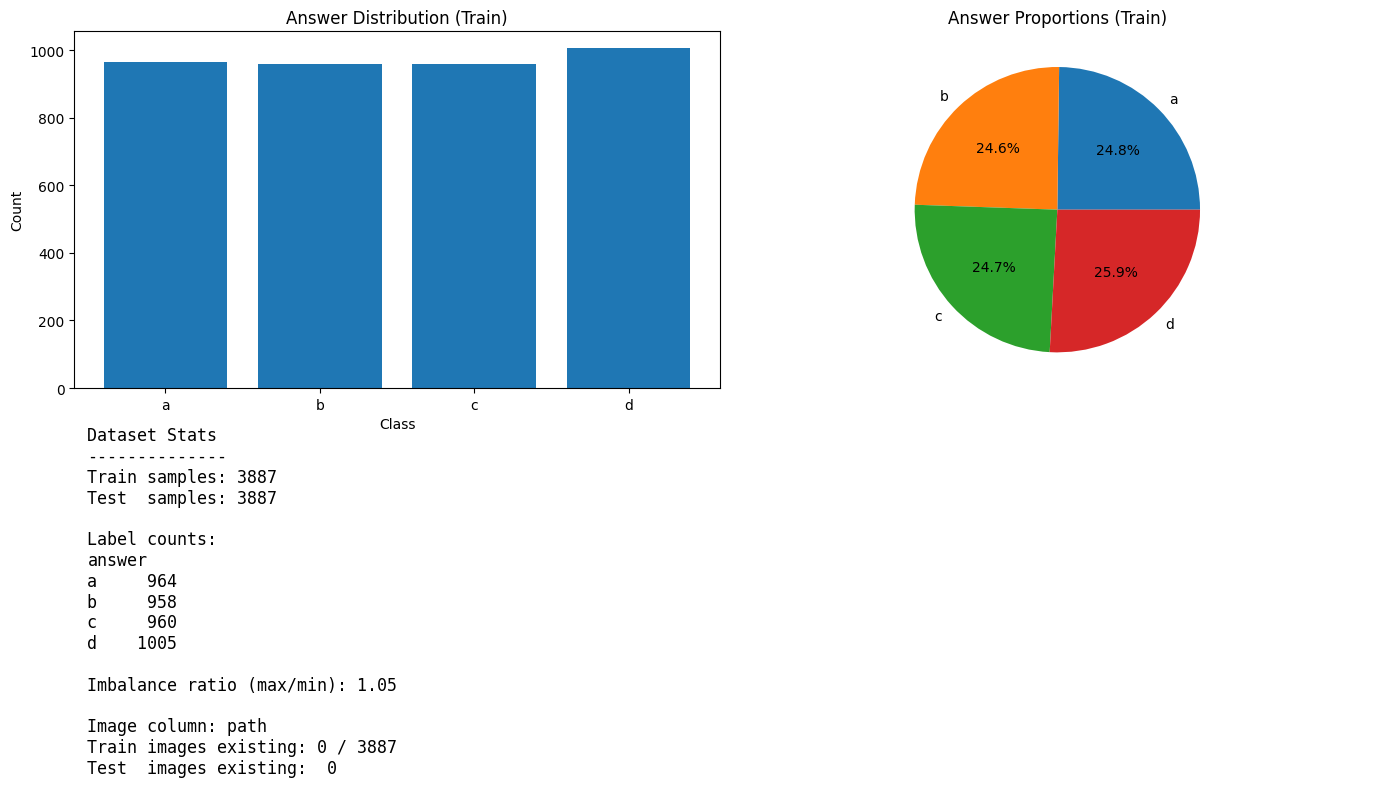

In [13]:

import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont

# ==== ÏÑ§Ï†ï ====
IMG_COL_CANDIDATES = ["path", "image_path", "img_path", "image"]
LABEL_COL = "answer"      # ÎùºÎ≤®Ïù¥ Îã§Î•∏ Ïù¥Î¶ÑÏù¥Î©¥ Î∞îÍøîÏ£ºÏÑ∏Ïöî
Q_COL = "question"
OPT_COLS = ["a", "b", "c", "d"]
IMAGE_ROOT = "/"          # Ï†àÎåÄÍ≤ΩÎ°úÎ©¥ "/" Ïú†ÏßÄ, ÏÉÅÎåÄÍ≤ΩÎ°úÎ©¥ Î≤†Ïù¥Ïä§ Í≤ΩÎ°ú ÏßÄÏ†ï

def pick_image_col(df):
    for c in IMG_COL_CANDIDATES:
        if c in df.columns:
            return c
    raise KeyError(f"Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú Ïª¨ÎüºÏùÑ Ï∞æÏßÄ Î™ªÌñàÏäµÎãàÎã§. ÌõÑÎ≥¥: {IMG_COL_CANDIDATES}")

IMG_COL = pick_image_col(train_df)

def exists_count(df):
    cnt = 0
    for p in df[IMG_COL].astype(str):
        abspath = p if os.path.isabs(p) else os.path.join(IMAGE_ROOT, p)
        if os.path.exists(abspath):
            cnt += 1
    return cnt

def show_label_distribution(train_df, test_df=None, label_col=LABEL_COL):
    vc = train_df[label_col].value_counts().sort_index()
    ratio = vc.max() / vc.min() if len(vc)>1 else 1.0

    fig = plt.figure(figsize=(14, 8))
    gs = fig.add_gridspec(2, 2, height_ratios=[3, 1])

    # ÎßâÎåÄ
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.bar(vc.index.astype(str), vc.values)
    ax1.set_title("Answer Distribution (Train)")
    ax1.set_xlabel("Class")
    ax1.set_ylabel("Count")

    # ÌååÏù¥
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.pie(vc.values, labels=vc.index.astype(str), autopct="%1.1f%%")
    ax2.set_title("Answer Proportions (Train)")

    # ÌÖçÏä§Ìä∏ Î∞ïÏä§
    ax3 = fig.add_subplot(gs[1, :])
    info = [
        "Dataset Stats",
        "--------------",
        f"Train samples: {len(train_df)}",
        f"Test  samples: {len(test_df) if test_df is not None else 'N/A'}",
        "",
        f"Label counts:\n{vc.to_string()}",
        "",
        f"Imbalance ratio (max/min): {ratio:.2f}",
        "",
        f"Image column: {IMG_COL}",
        f"Train images existing: {exists_count(train_df)} / {len(train_df)}",
        f"Test  images existing:  {exists_count(test_df) if test_df is not None else 'N/A'}",
    ]
    ax3.text(0.01, 0.05, "\n".join(info), family="monospace", fontsize=12)
    ax3.axis("off")
    plt.tight_layout()
    plt.show()

show_label_distribution(train_df, test_df)



## 4-2. Î∂ÑÌï† Ï†Ñ/ÌõÑ Î∂ÑÌè¨ ÎπÑÍµê
‚ÄúÏõêÎûòÎ∂ÄÌÑ∞ Í∑†ÌòïÏù∏ÏßÄ‚ÄùÎ•º train/validÎ°ú ÎÇòÎà†ÎèÑ Ïú†ÏßÄÎêòÎäîÏßÄ Ìï®Íªò Ï≤¥ÌÅ¨.

In [14]:

def compare_distributions(all_df, train_df_split, valid_df_split, label_col=LABEL_COL):
    for name, df in {"ALL": all_df, "TRAIN": train_df_split, "VALID": valid_df_split}.items():
        vc = df[label_col].value_counts().sort_index()
        ratio = vc.max()/vc.min() if len(vc)>1 else 1.0
        print(f"\n[{name}]")
        print(vc)
        print(f"Imbalance ratio: {ratio:.2f}")

# Ïòà: 9:1 Îã®Ïàú Î∂ÑÌï† (Ïó¨Í∏∞ÏÑúÎäî stratify ÏóÜÏù¥ ÏÉòÌîå)
split_idx = int(len(train_df)*0.9)
train_subset = train_df.iloc[:split_idx]
valid_subset = train_df.iloc[split_idx:]
compare_distributions(train_df, train_subset, valid_subset)




[ALL]
answer
a     964
b     958
c     960
d    1005
Name: count, dtype: int64
Imbalance ratio: 1.05

[TRAIN]
answer
a    871
b    856
c    865
d    906
Name: count, dtype: int64
Imbalance ratio: 1.06

[VALID]
answer
a     93
b    102
c     95
d     99
Name: count, dtype: int64
Imbalance ratio: 1.10


## 4-3. Ïù¥ÎØ∏ÏßÄ Î©îÌÉÄ(Í∞ÄÎ°ú√óÏÑ∏Î°ú) Î∂ÑÌè¨ ÌôïÏù∏
‚ÄúÏù¥ÎØ∏ÏßÄ Î©îÌÉÄ(Í∞ÄÎ°ú√óÏÑ∏Î°ú) Î∂ÑÌè¨ ÌôïÏù∏‚ÄùÏùÄ Îã®ÏàúÌûà Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Î•º Î≥¥Í∏∞ ÏúÑÌïú Í≤å ÏïÑÎãàÎùº, **Î™®Îç∏ ÌïôÏäµ Í≥ºÏ†ïÏóêÏÑú Î∞úÏÉùÌï† Ïàò ÏûàÎäî Ïò§Î•ò¬∑ÎπÑÌö®Ïú®ÏùÑ ÎØ∏Î¶¨ ÏòàÎ∞©ÌïòÍ∏∞ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ ÏßÑÎã® Îã®Í≥Ñ**ÏòàÏöî.

### Ïôú Ïù¥Í±∏ ÌïòÎäîÍ∞Ä
#### 1Ô∏è‚É£ Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞ Îã§ÏñëÏÑ±ÏùÑ ÌååÏïÖÌï¥ÏÑú **Ï†ÑÏ≤òÎ¶¨ Ï†ïÏ±Ö**ÏùÑ Ï†ïÌïòÍ∏∞ ÏúÑÌï®
* Vision-Language Î™®Îç∏(`Qwen3-VL` Í∞ôÏùÄ)ÏùÄ ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Ïóê ÎØºÍ∞êÌï¥Ïöî.
* ÎßåÏïΩ Îç∞Ïù¥ÌÑ∞Ïóê **Í∑πÎã®Ï†ÅÏúºÎ°ú ÌÅ∞ Ïù¥ÎØ∏ÏßÄ(Ïòà: 4000√ó3000)**, **ÏÑ∏Î°úÎ°ú Í∏¥ Ïù¥ÎØ∏ÏßÄ(Ïòà: 400√ó3000)**Í∞Ä ÏÑûÏó¨ ÏûàÎã§Î©¥:

  * GPU Î©îÎ™®Î¶¨ Ï¥àÍ≥º(OOM) Î∞úÏÉù
  * ÌïôÏäµ ÏÜçÎèÑ Ï†ÄÌïò
  * aspect ratio ÏôúÍ≥° (Î¨ºÏ≤¥Í∞Ä ÎàåÎ¶¨Í±∞ÎÇò Í∏∏Í≤å Î≥¥ÏûÑ)
* Í∑∏ÎûòÏÑú ‚ÄúÏ†ÑÏ≤¥ Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞ Î∂ÑÌè¨(Í∞ÄÎ°ú¬∑ÏÑ∏Î°ú)‚ÄùÎ•º Î≥¥Í≥†,

  * ÎåÄÎ∂ÄÎ∂ÑÏù¥ 300~600pxÏù¥ÎùºÎ©¥ Í∑∏ÎåÄÎ°ú Î¶¨ÏÇ¨Ïù¥Ï¶à Í∞ÄÎä•
  * ÏùºÎ∂ÄÎßå ÌÅ¨Î©¥, outlierÎßå ÌïÑÌÑ∞ÎßÅ
  * ÏÑ∏Î°úÎ°ú Í∏¥ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÎßéÏúºÎ©¥, **padding Ï†ÑÎûµ**(Ïòà: letterbox)ÏùÑ Í≥†Î†§

#### 2Ô∏è‚É£ Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Î¨∏Ï†úÎ•º ÎØ∏Î¶¨ ÌÉêÏßÄ
* ÌÅ¨Í∏∞Í∞Ä `0x0`, `1x1`, ÌòπÏùÄ Ïó¥ Ïàò ÏóÜÎäî ÏÜêÏÉÅÎêú ÌååÏùºÏù¥ ÏûàÏúºÎ©¥
  ‚Üí `Image.open()` Îã®Í≥ÑÏóêÏÑú Ïò§Î•òÍ∞Ä ÎÇ©ÎãàÎã§.
* Ïù¥Îü∞ Ïù¥ÎØ∏ÏßÄÎ•º ÌïôÏäµ Ï§ëÏóê Ï≤òÏùå ÎßåÎÇòÎ©¥ **ÌõàÎ†®Ïù¥ Ï§ëÎã®**Îê† Ïàò ÏûàÏúºÎØÄÎ°ú,
  ÏÇ¨Ï†Ñ Ï†êÍ≤ÄÏúºÎ°ú `None` Í∞íÏù¥ ÏûàÎäî ÌååÏùº Í≤ΩÎ°úÎ•º ÎØ∏Î¶¨ Ï∞æÏäµÎãàÎã§.

#### 3Ô∏è‚É£ Î™®Îç∏Ïùò **ÏûÖÎ†• Ìï¥ÏÉÅÎèÑ(IMAGE_SIZE)**Î•º Í≤∞Ï†ïÌï† Îïå Ï∞∏Í≥†

* ÏßÄÍ∏à `IMAGE_SIZE = 384`Î°ú ÏßÄÏ†ïÎêòÏñ¥ ÏûàÎäîÎç∞,
  Î∂ÑÌè¨Î•º Î≥¥Î©¥ ÌèâÍ∑†Ï†ÅÏù∏ Ïù¥ÎØ∏ÏßÄ Ìè≠/ÎÜíÏù¥Î•º ÌôïÏù∏Ìï† Ïàò ÏûàÏ£†.
* ÏòàÎ•º Îì§Ïñ¥ ÎåÄÎ∂ÄÎ∂ÑÏù¥ 1280√ó720Ïù¥Î©¥ `512` Ï†ïÎèÑÎ°ú Ïò¨Î†§ÎèÑ Ï¢ãÍ≥†,
  ÎåÄÎ∂ÄÎ∂ÑÏù¥ 300~400ÎåÄÎ©¥ `384` Í∑∏ÎåÄÎ°ú ÎëêÎäî Í≤å Ìö®Ïú®Ï†ÅÏù¥ÏóêÏöî.

#### 4Ô∏è‚É£ **Î¶¨ÏÇ¨Ïù¥Ï¶à/ÌÅ¨Î°≠ ÌõÑ ÏãúÍ∞ÅÏ†Å ÏôúÍ≥° ÏúÑÌóò** ÌôïÏù∏

* ÏòàÎ•º Îì§Ïñ¥ Ïã†Î∞ú ÏÇ¨ÏßÑÏù∏Îç∞ ÏÑ∏Î°úÎ°ú Í∏∏Ï≠âÌïú Ïù¥ÎØ∏ÏßÄÍ∞Ä ÎßéÎã§Î©¥,
  `RandomResizedCrop(384,384)`Î•º Ïì∞Î©¥ ÏùºÎ∂Ä ÏòÅÏó≠Ïù¥ ÏûòÎ¶¥ Ïàò ÏûàÏñ¥Ïöî.
* Î∂ÑÌè¨Î•º Î≥¥Í≥† ‚Äúaspect ratioÍ∞Ä ÏïàÏ†ïÏ†ÅÏù∏Í∞Ä‚ÄùÎ•º ÌôïÏù∏Ìï®ÏúºÎ°úÏç®
  Ï¶ùÍ∞ï Í∞ïÎèÑÎ•º ÏïàÏ†ÑÌïòÍ≤å Ï°∞Ï†àÌï† Ïàò ÏûàÏäµÎãàÎã§.


#### üìä ÏòàÏãú Ìï¥ÏÑù

| Ìï≠Î™©               | ÏùòÎØ∏         | ÏòàÏãú Ìï¥ÏÑù                 |
| ---------------- | ---------- | --------------------- |
| Width histogram  | Í∞ÄÎ°ú Í∏∏Ïù¥ Î∂ÑÌè¨   | ÎåÄÎ∂ÄÎ∂Ñ 300~500Ïù¥Î©¥ Î¨∏Ï†ú ÏóÜÏùå   |
| Height histogram | ÏÑ∏Î°ú Í∏∏Ïù¥ Î∂ÑÌè¨   | ÏùºÎ∂ÄÎßå 1000 Ïù¥ÏÉÅÏù¥Î©¥ Î¶¨ÏÇ¨Ïù¥Ï¶à Í≥†Î†§ |
| ÎπÑÏ†ïÏÉÅÍ∞í(None)       | Ïó¥ Ïàò ÏóÜÎäî Ïù¥ÎØ∏ÏßÄ | Í≤ΩÎ°ú Î¨∏Ï†ú or ÏÜêÏÉÅÎêú ÌååÏùº       |


#### ‚úÖ ÏöîÏïΩ

> Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞ Î∂ÑÌè¨Î•º Î≥¥Îäî Ïù¥Ïú†Îäî **Îç∞Ïù¥ÌÑ∞Ïùò ÏùºÍ¥ÄÏÑ±Í≥º ÌíàÏßàÏùÑ Ï†êÍ≤ÄÌïòÍ≥†**,
> **Î™®Îç∏ ÏûÖÎ†• ÌÅ¨Í∏∞ Î∞è Ï¶ùÍ∞ï Ï†ÑÎûµÏùÑ ÏïàÏ†ÑÌïòÍ≤å Í≤∞Ï†ïÌïòÍ∏∞ ÏúÑÌï¥ÏÑú**ÏòàÏöî.




[ROOT ÌõÑÎ≥¥Î≥Ñ Ï†ÅÏ§ë Í∞úÏàò] {'': 50, '/': 0, '/home/team067': 0, '/content': 50, '/content/drive/My Drive': 0}
[ÏÑ†ÌÉùÎêú IMAGE_ROOT] 
‚úÖ ÏùΩÏùÄ Ïù¥ÎØ∏ÏßÄ: 1000 / 1000 (Ïã§Ìå® 0)
Width  stat: {'n': 1000, 'min': 194, 'p25': 540, 'median': 540, 'p75': 720, 'max': 720, 'mean': 589.228}
Height stat: {'n': 1000, 'min': 183, 'p25': 551, 'median': 720, 'p75': 720, 'max': 720, 'mean': 664.195}
Aspect stat (W/H): {'n': 1000, 'min': 0.449, 'p25': np.float64(0.75), 'median': np.float64(0.75), 'p75': np.float64(1.041), 'max': 3.09, 'mean': 0.936}


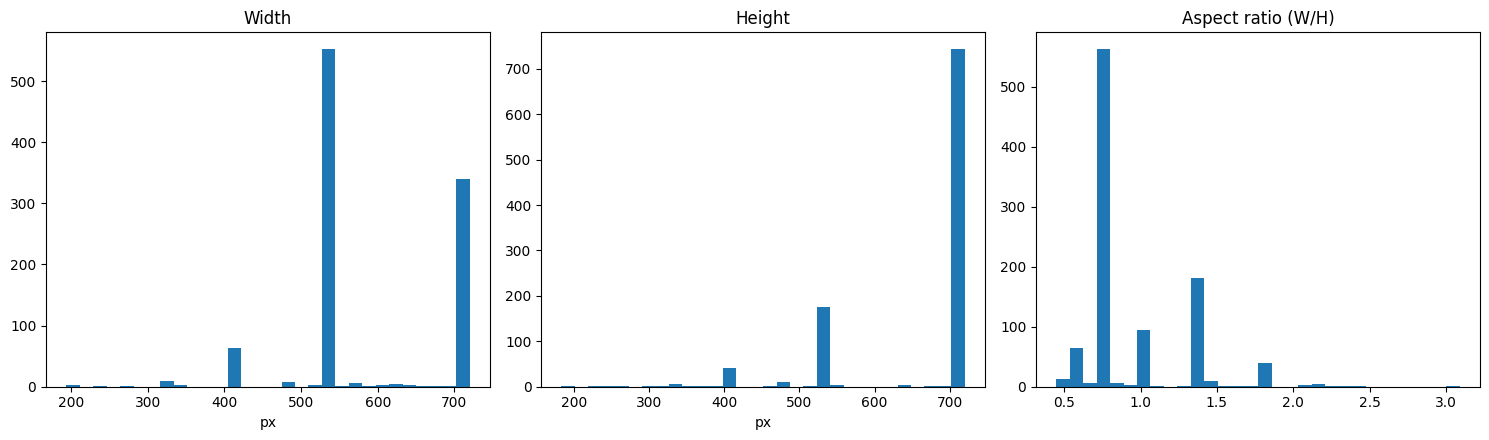

üîß Í∂åÏû• ÏûÖÎ†• Ìï¥ÏÉÅÎèÑ ÎåÄÎûµ: 384px (ÌòÑÏû¨ IMAGE_SIZE=384)


In [15]:

# ===== Robust image meta checker (drop-in) =====
import os, io, math, random, textwrap, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# 0) Ïñ¥Îñ§ Ïª¨ÎüºÏù¥ Í≤ΩÎ°úÏù∏ÏßÄ ÏûêÎèô ÌÉêÏÉâ
def detect_image_col(df, candidates=("path","image_path","img_path","image","img","filepath","file")):
    for c in candidates:
        if c in df.columns:
            return c
    raise KeyError(f"Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú Ïª¨ÎüºÏùÑ Ï∞æÏßÄ Î™ªÌñàÏäµÎãàÎã§. ÌõÑÎ≥¥: {candidates}")

# 1) Í≤ΩÎ°úÎ•º Ïã§Ï†ú ÌååÏùºÎ°ú Ìï¥ÏÑù (ROOT ÌõÑÎ≥¥ ÏûêÎèô ÌÉêÏÉâ)
def detect_image_root(df, img_col, candidate_roots=None, sample_n=50):
    paths = df[img_col].astype(str).head(sample_n).tolist()
    paths = [p.strip().replace("\\","/") for p in paths]
    if candidate_roots is None:
        candidate_roots = [
            "",                      # Ïù¥ÎØ∏ Ï†àÎåÄÍ≤ΩÎ°úÏùº ÏàòÎèÑ ÏûàÏùå
            "/",
            "/home/team067",
            "/content",
            "/content/drive/My Drive",
        ]
    hit_counts = {}
    for root in candidate_roots:
        cnt = 0
        for p in paths:
            abspath = p if os.path.isabs(p) else os.path.join(root, p)
            if os.path.exists(abspath):
                cnt += 1
        hit_counts[root] = cnt
    # Í∞ÄÏû• ÎßéÏù¥ ÎßûÎäî ROOT ÏÑ†ÌÉù
    best_root = max(hit_counts, key=hit_counts.get)
    return best_root, hit_counts

# 2) Ìïú Ïû•Ïùò ÌÅ¨Í∏∞ ÏùΩÍ∏∞ (ÌååÏùºÎßå; URL/GSÎäî Ï†úÏô∏)
def read_size(abspath):
    try:
        with Image.open(abspath) as im:
            return im.size  # (W,H)
    except Exception:
        return None

# 3) Î∂ÑÌè¨/ÏöîÏïΩ Ï∂úÎ†•
def analyze_image_sizes(df, img_col=None, image_root=None, sample_n=1000):
    if img_col is None:
        img_col = detect_image_col(df)
    # ROOT ÏûêÎèô Í≤ÄÏ∂ú
    if image_root is None:
        image_root, hits = detect_image_root(df, img_col)
        print("[ROOT ÌõÑÎ≥¥Î≥Ñ Ï†ÅÏ§ë Í∞úÏàò]", hits)
        print("[ÏÑ†ÌÉùÎêú IMAGE_ROOT]", image_root)

    # ÏÇ¨Ïù¥Ï¶à ÏàòÏßë
    sub = df.sample(min(len(df), sample_n), random_state=42)
    ok, fail = [], []
    for p in sub[img_col].astype(str):
        p = p.strip().replace("\\","/")
        abspath = p if os.path.isabs(p) else os.path.join(image_root, p)
        if os.path.exists(abspath):
            s = read_size(abspath)
            (ok if s else fail).append((p, abspath))
            if s: ok[-1] = (*ok[-1], s)  # (rel, abs, (W,H))
        else:
            fail.append((p, abspath, None))

    if not ok:
        print("‚ùå Ïù¥ÎØ∏ÏßÄ Î©îÌÉÄÎ•º ÌïòÎÇòÎèÑ ÏùΩÏßÄ Î™ªÌñàÏäµÎãàÎã§.")
        print("  - CSV Í≤ΩÎ°ú Í∞íÏù¥ Ïã§Ï†ú ÌååÏùºÍ≥º ÎßûÎäîÏßÄ ÌôïÏù∏ÌïòÏÑ∏Ïöî.")
        print("  - ÏòàÏãú 10Í∞ú:")
        for i, t in enumerate(fail[:10]):
            print(f"  [{i}] CSV='{t[0]}'  -> resolved='{t[1]}'  (Ï°¥Ïû¨X)")
        return

    widths  = [w for *_ , (w,h) in ok]
    heights = [h for *_ , (w,h) in ok]
    aspect  = [w/h for w,h in zip(widths, heights) if h>0]

    # ÏöîÏïΩ ÌÜµÍ≥Ñ
    def stat(x):
        return dict(n=len(x), min=int(np.min(x)), p25=int(np.percentile(x,25)),
                    median=int(np.median(x)), p75=int(np.percentile(x,75)),
                    max=int(np.max(x)), mean=float(np.mean(x)))
    ws, hs = stat(widths), stat(heights)

    print(f"‚úÖ ÏùΩÏùÄ Ïù¥ÎØ∏ÏßÄ: {len(ok)} / {len(sub)} (Ïã§Ìå® {len(fail)})")
    print("Width  stat:", ws)
    print("Height stat:", hs)
    if aspect:
        asp = dict(n=len(aspect), min=round(min(aspect),3), p25=round(np.percentile(aspect,25),3),
                   median=round(np.median(aspect),3), p75=round(np.percentile(aspect,75),3),
                   max=round(max(aspect),3), mean=round(float(np.mean(aspect)),3))
        print("Aspect stat (W/H):", asp)

    # Ïã§Ìå® ÏòàÏãú Î™á Í∞ú
    if fail:
        print("\n‚ö†Ô∏è Ïó¥Í∏∞ Ïã§Ìå® ÏòàÏãú 5Í∞ú:")
        for i, t in enumerate(fail[:5]):
            rel, abs_p = t[0], t[1]
            print(f"  [{i}] CSV='{rel}' -> resolved='{abs_p}'")

    # ÌûàÏä§ÌÜ†Í∑∏Îû®
    plt.figure(figsize=(15,4.5))
    plt.subplot(1,3,1); plt.hist(widths, bins=30);  plt.title("Width");  plt.xlabel("px")
    plt.subplot(1,3,2); plt.hist(heights, bins=30); plt.title("Height"); plt.xlabel("px")
    plt.subplot(1,3,3); plt.hist(aspect, bins=30);  plt.title("Aspect ratio (W/H)")
    plt.tight_layout(); plt.show()

    # Î¶¨ÏÇ¨Ïù¥Ï¶à Í∂åÏû•Ïïà (Í∞ÑÎã® Í∑úÏπô)
    rec = 384
    if np.median(widths) > 900 or np.median(heights) > 900: rec = 512
    if np.percentile(widths,90) > 1600 or np.percentile(heights,90) > 1600: rec = 448
    print(f"üîß Í∂åÏû• ÏûÖÎ†• Ìï¥ÏÉÅÎèÑ ÎåÄÎûµ: {rec}px (ÌòÑÏû¨ IMAGE_SIZE={globals().get('IMAGE_SIZE','?')})")

# ===== Ïã§Ìñâ (train_df Î°úÎìú ÏßÅÌõÑÏóê) =====
analyze_image_sizes(train_df)


# 5. ÌïôÏäµÏö© Ïù¥ÎØ∏ÏßÄ Ï¶ùÍ∞ï ÌååÏù¥ÌîÑÎùºÏù∏


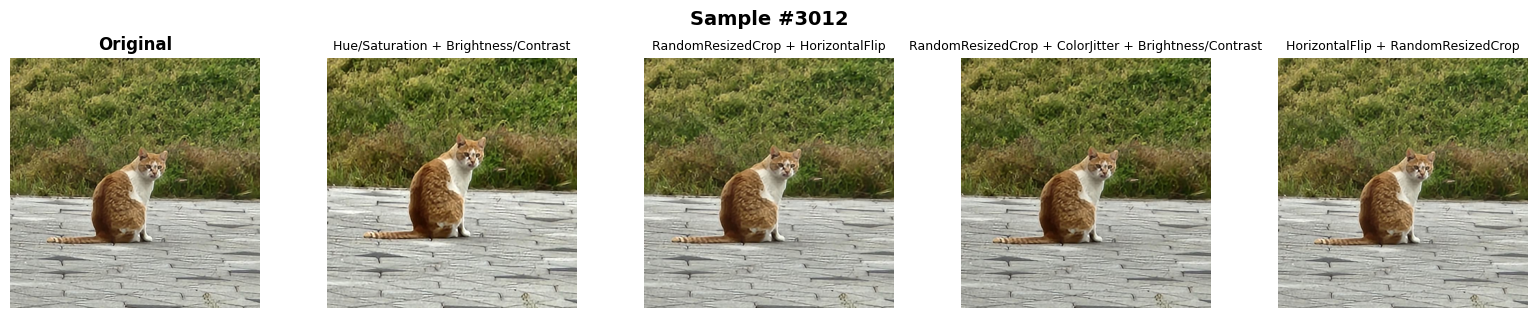

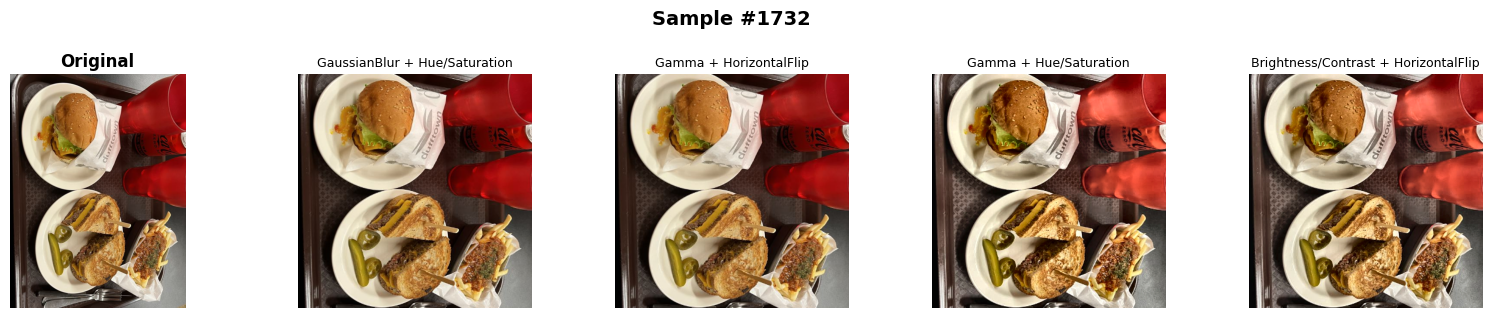

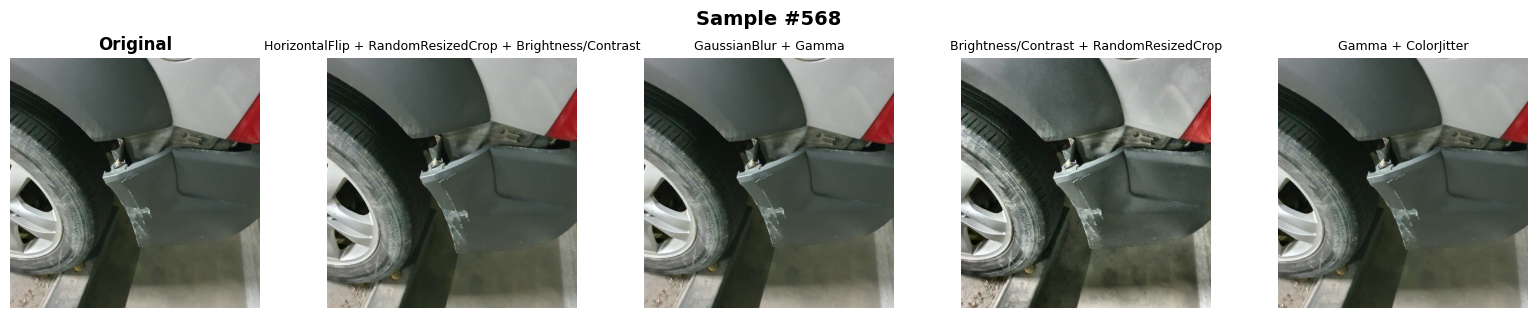

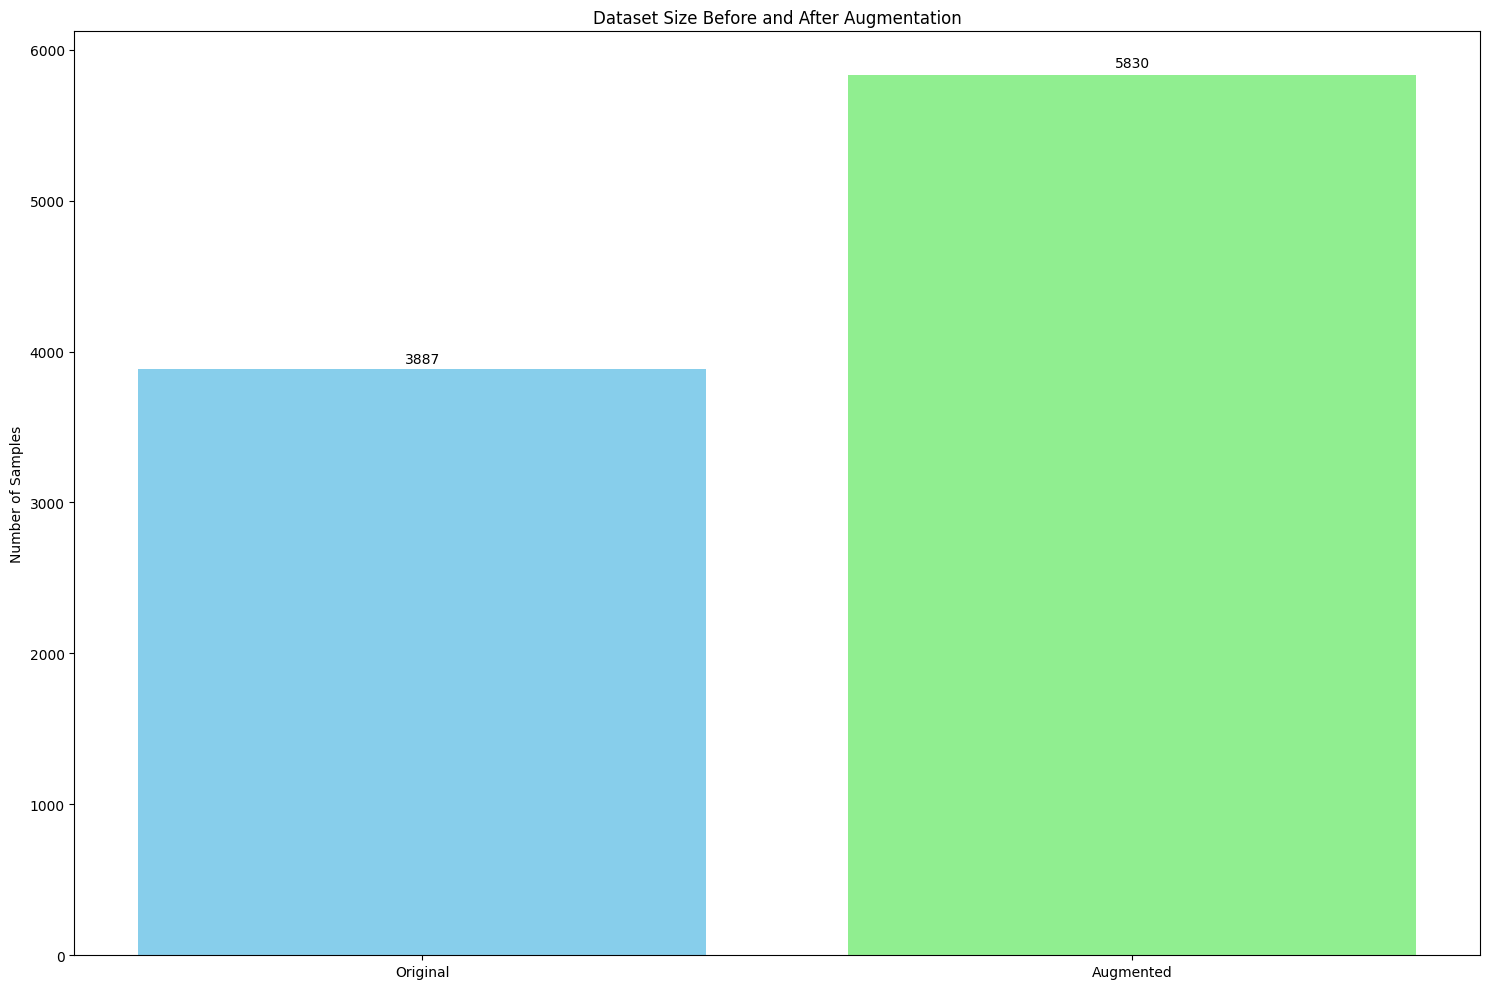

In [16]:
# ==========================
# üì∏ Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï Î∞è ÏãúÍ∞ÅÌôî ÏΩîÎìú
# ==========================

import albumentations as A
from albumentations.pytorch import ToTensorV2

# ---- 1Ô∏è‚É£ Albumentations Ï¶ùÍ∞ï ÌååÏù¥ÌîÑÎùºÏù∏ Ï†ïÏùò ----
# VQAÏóê ÏµúÏ†ÅÌôîÎêú Ï¶ùÍ∞ï ÌååÏù¥ÌîÑÎùºÏù∏
AUGMENT = A.Compose([
    A.RandomResizedCrop(
        size=(384, 384),
        scale=(0.9, 1.0),     # 0.85 -> 0.9 (Îçî Ï†ÅÏùÄ ÌÅ¨Î°≠)
        ratio=(0.85, 1.15),   # Ï¢ÖÌö°ÎπÑ Î≤îÏúÑ Ï∂ïÏÜå
        p=1.0
    ),
    A.ColorJitter(
        brightness=0.08,      # 0.1 -> 0.08 (Îçî ÏïΩÌïú Î≥ÄÌôî)
        contrast=0.08,        # 0.1 -> 0.08
        saturation=0.0,
        hue=0.0,
        p=0.4                 # 0.3 -> 0.4 (Îçî ÏûêÏ£º Ï†ÅÏö©)
    ),
    A.CLAHE(
        clip_limit=2.5,       # 2.0 -> 2.5 (ÏïΩÍ∞Ñ Îçî Í∞ïÌïú ÎåÄÎπÑ)
        tile_grid_size=(8, 8),
        p=0.3                 # 0.2 -> 0.3
    ),
])


# ---- 2Ô∏è‚É£ ÏãúÍ∞ÅÌôî Ìï®Ïàò ----
def visualize_aug_examples(df, img_col="path", n_samples=3, aug_per_sample=4):
    """
    n_samples: Î™á Í∞úÏùò Ïù¥ÎØ∏ÏßÄÎ•º ÎûúÎç§ ÏÉòÌîåÎßÅÌï†ÏßÄ
    aug_per_sample: Í∞Å Ïù¥ÎØ∏ÏßÄÎãπ Î™á Í∞úÏùò Ï¶ùÍ∞ï Í≤∞Í≥ºÎ•º Î≥¥Ïó¨Ï§ÑÏßÄ
    """
    idxs = np.random.choice(len(df), size=min(n_samples, len(df)), replace=False)

    # ÎåÄÌëú Ï¶ùÍ∞ï Ïù¥Î¶Ñ ÎùºÎ≤®
    aug_labels = [
        "RandomResizedCrop",
        "Brightness/Contrast",
        "ColorJitter",
        "HorizontalFlip",
        "GaussianBlur",
        "Hue/Saturation",
        "Gamma",
    ]

    for idx in idxs:
        path = str(df.iloc[idx][img_col])
        img = Image.open(path).convert("RGB")

        fig, axs = plt.subplots(1, aug_per_sample + 1, figsize=(3.2*(aug_per_sample+1), 3.2))
        axs[0].imshow(img)
        axs[0].set_title("Original", fontsize=12, fontweight="bold")
        axs[0].axis("off")

        for k in range(aug_per_sample):
            aug_img = AUGMENT(image=np.array(img))["image"]
            axs[k+1].imshow(aug_img)

            # ÎûúÎç§ Ï°∞Ìï© ÎùºÎ≤® (2~3Í∞ú Ï†ïÎèÑ ÏÑûÏñ¥ÏÑú Ï†úÎ™©Ïóê ÌëúÏãú)
            selected_labels = np.random.choice(aug_labels, size=random.randint(2,3), replace=False)
            axs[k+1].set_title(" + ".join(selected_labels), fontsize=9)
            axs[k+1].axis("off")

        plt.suptitle(f"Sample #{idx}", fontsize=14, fontweight="bold")
        plt.tight_layout()
        plt.show()

# ---- 3Ô∏è‚É£ Ï¶ùÍ∞ï ÏòàÏãú ÏãúÍ∞ÅÌôî Ïã§Ìñâ ----
visualize_aug_examples(train_df, img_col="path", n_samples=3, aug_per_sample=4)


# ---- 4Ô∏è‚É£ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ Î≥ÄÌôî ÌôïÏù∏ ----
def show_dataset_growth(original_df, augmented_factor=2):
    original_count = len(original_df)
    augmented_count = int(original_count * augmented_factor)

    plt.figure(figsize=(15, 10))
    plt.bar(["Original", "Augmented"], [original_count, augmented_count], color=["skyblue", "lightgreen"])
    plt.title("Dataset Size Before and After Augmentation")
    plt.ylabel("Number of Samples")
    plt.text(0, original_count*1.01, f"{original_count}", ha="center")
    plt.text(1, augmented_count*1.01, f"{augmented_count}", ha="center")
    plt.tight_layout()
    plt.show()

show_dataset_growth(train_df, augmented_factor=1.5)


# 6. Î™®Îç∏, Processor

7.5GB Ï†ïÎèÑÏùò Î™®Îç∏ Îã§Ïö¥Î°úÎìúÍ∞Ä ÏßÑÌñâÎê©ÎãàÎã§. 10~20Î∂Ñ Ï†ïÎèÑÍ∞Ä ÏÜåÏöîÎê©ÎãàÎã§.

#### Ïã§Ïäµ Ï∞∏Í≥† ÎÇ¥Ïö©

    Ï±ïÌÑ∞ 5-1 PEFT(ÌååÎùºÎØ∏ÌÑ∞ Ìö®Ïú®Ï†Å ÌäúÎãù)
    - LoRA Íµ¨ÌòÑ : LoraConfig()

### Í∏∞Ï°¥ÏΩîÎìú

In [17]:
!nvidia-smi

Sat Oct 25 18:23:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0             45W /  400W |       5MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [18]:
from transformers import Qwen3VLForConditionalGeneration, AutoProcessor # Ensure Qwen3VLForConditionalGeneration is imported here

# ÏñëÏûêÌôî
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16,
)

# ÌîÑÎ°úÏÑ∏ÏÑú
processor = AutoProcessor.from_pretrained(
    MODEL_ID,
    trust_remote_code=True,
)

# ÏÇ¨Ï†ÑÌïôÏäµ Î™®Îç∏
base_model = Qwen3VLForConditionalGeneration.from_pretrained( # Use the new model class
    MODEL_ID,
    quantization_config=bnb_config,
    device_map="auto",
    trust_remote_code=True,
)

# ÏñëÏûêÌôî Î™®Îç∏Î°ú Î°úÎìú
base_model = prepare_model_for_kbit_training(base_model)
base_model.gradient_checkpointing_enable()

# LoRA ÏÑ∏ÌåÖ
lora_config = LoraConfig(
    r=12,
    lora_alpha=24,
    lora_dropout=0.07,
    bias="none",
    target_modules=["q_proj","k_proj","v_proj","o_proj","gate_proj","up_proj","down_proj"],
    task_type="CAUSAL_LM",
)

# PEFT Î™®Îç∏ ÏÉùÏÑ±
model = get_peft_model(base_model, lora_config)
model.print_trainable_parameters()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/390 [00:00<?, ?B/s]

chat_template.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

video_preprocessor_config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.91G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/269 [00:00<?, ?B/s]

trainable params: 24,772,608 || all params: 4,462,588,416 || trainable%: 0.5551


# 6. ÌîÑÎ°¨ÌîÑÌä∏ ÌÖúÌîåÎ¶ø

#### Ïã§Ïäµ Ï∞∏Í≥† ÎÇ¥Ïö©

    Ï±ïÌÑ∞ 5-1 PEFT(ÌååÎùºÎØ∏ÌÑ∞ Ìö®Ïú®Ï†Å ÌäúÎãù)
    - ÌîÑÎ°¨ÌîÑÌä∏ ÌÖúÌîåÎ¶ø : convert_to_chatml(), formatting_prompts_func()

In [19]:
# Î™®Îç∏ ÏßÄÏãúÏÇ¨Ìï≠
SYSTEM_INSTRUCT = (
    # 1. Ïó≠Ìï† Î∂ÄÏó¨ (Í∞ÄÏù¥ÎìúÎ∂Å "Ïó≠Ìï† Î∂ÄÏó¨" Ìå®ÌÑ¥ Ï†ÅÏö©)
    # - Î™ÖÌôïÌïú Ï†ÑÎ¨∏Í∞Ä Ïó≠Ìï† Ï†ïÏùòÎ°ú ÎãµÎ≥ÄÏùò Ï†ÑÎ¨∏ÏÑ±Í≥º ÏùºÍ¥ÄÏÑ± ÌôïÎ≥¥
    "You are an expert visual analysis AI specialized in multiple-choice questions.\n"
    "Your capabilities include:\n"
    "1. Precise image analysis\n"
    "2. Contextual understanding\n"
    "3. Logical reasoning\n\n"

    # 2. Î™ÖÌôïÌïú Ï∂úÎ†• ÌòïÏãù (Í∞ÄÏù¥ÎìúÎ∂Å "ÏõêÌïòÎäî Ï∂úÎ†• ÌòïÏãù ÏßÄÏãú" ÏõêÏπô Ï†ÅÏö©)
    # - Îã®Ïùº Î¨∏ÏûêÎßå Ï∂úÎ†•ÌïòÎèÑÎ°ù Í∞ïÏ†úÌïòÏó¨ ÌõÑÏ≤òÎ¶¨ ÌïÑÏöîÏÑ± ÏµúÏÜåÌôî
    "OUTPUT REQUIREMENTS:\n"
    "- Return exactly one lowercase letter (a, b, c, or d)\n"
    "- No other text, punctuation, or explanations\n"
    "- No spaces or line breaks\n\n"

    # 3. ÌíàÏßà Í∏∞Ï§Ä (Í∞ÄÏù¥ÎìúÎ∂Å "Î™ÖÌôïÌïòÍ≥† Íµ¨Ï≤¥Ï†ÅÏúºÎ°ú Î¨ªÍ∏∞" ÏõêÏπô Ï†ÅÏö©)
    # - Î∂ÑÏÑù ÌíàÏßà Í∏∞Ï§ÄÏùÑ Î™ÖÏãúÌïòÏó¨ Îçî Ïã†Ï§ëÌïú ÎãµÎ≥Ä Ïú†ÎèÑ
    "QUALITY STANDARDS:\n"
    "1. Examine all visual details thoroughly\n"
    "2. Consider the specific context of each question\n"
    "3. Evaluate all options systematically\n"
    "4. Choose the single most accurate answer based on visual evidence"

    # 4. System InstructionÏóê Î∂ÄÏ†ïÎ¨∏ Í¥ÄÎ†® Í∞ÄÏù¥Îìú Ï∂îÍ∞Ä
    "SPECIAL INSTRUCTIONS:\n"
    "- For negative questions (e.g., 'NOT included', 'CANNOT see'), carefully check all options\n"
    "- Pay extra attention to excluded or missing elements\n"
)

# ÌîÑÎ°¨ÌîÑÌä∏ ÌÖúÌîåÎ¶ø
def build_mc_prompt(question, a, b, c, d):
    # Î∂ÄÏ†ïÎ¨∏ Ïó¨Î∂Ä ÌôïÏù∏
    is_negative = any(word in question.lower()
                     for word in ['ÏïäÏùÄ', 'ÏóÜÎäî', 'Ï†úÏô∏', 'not', 'except', 'missing'])

    # 1. Îã®Í≥ÑÏ†Å Ï†ëÍ∑º (Í∞ÄÏù¥ÎìúÎ∂Å "Îã®Í≥ÑÏ†Å Ï†ëÍ∑º" Ìå®ÌÑ¥ Ï†ÅÏö©)
    # - Î∂ÑÏÑù Í≥ºÏ†ïÏùÑ Î™ÖÌôïÌïú Îã®Í≥ÑÎ°ú Íµ¨Î∂ÑÌïòÏó¨ Îçî Ï≤¥Í≥ÑÏ†ÅÏù∏ ÎãµÎ≥Ä Ïú†ÎèÑ
    return (
        "TASK: Visual Question Analysis\n\n"
        # Î∂ÄÏ†ïÎ¨∏Ïùº Í≤ΩÏö∞ ÌäπÎ≥Ñ ÏßÄÏãúÏÇ¨Ìï≠ Ï∂îÍ∞Ä
        f"{'! NEGATIVE QUESTION ALERT ! \n- Focus on what is NOT present in the image\n- Check all options carefully\n\n' if is_negative else ''}"

        # 2. Îß•ÎùΩ Ï†úÍ≥µ (Í∞ÄÏù¥ÎìúÎ∂Å "ÌïÑÏöîÌïú Îß•ÎùΩ Ï†úÍ≥µ" ÏõêÏπô Ï†ÅÏö©)
        # - ÏßàÎ¨∏Í≥º ÏÑ†ÌÉùÏßÄÎ•º Íµ¨Ï°∞ÌôîÌïòÏó¨ Ï†úÏãú
        f"QUESTION TO ANALYZE:\n{question}\n\n"
        f"OPTIONS TO EVALUATE:\n"
        f"a) {a}\n"
        f"b) {b}\n"
        f"c) {c}\n"
        f"d) {d}\n\n"

        # 3. Î∂ÑÏÑù Îã®Í≥Ñ Î™ÖÏãú (Í∞ÄÏù¥ÎìúÎ∂Å "Chain-of-Thought" Ìå®ÌÑ¥ Ï†ÅÏö©)
        # - Î™®Îç∏Ïùò Î∂ÑÏÑù Í≥ºÏ†ïÏùÑ Îã®Í≥ÑÎ≥ÑÎ°ú ÏïàÎÇ¥
        "ANALYSIS STEPS:\n"
        "1. Examine all visual elements in the image\n"
        "2. Understand the specific requirements of the question\n"
        "3. Consider each option against the visual evidence\n"
        "4. Select the most accurate answer\n\n"

        # 4. ÏµúÏ¢Ö Ï∂úÎ†• ÌòïÏãù Ïû¨Í∞ïÏ°∞
        # - ÎßàÏßÄÎßâÏóê Ìïú Î≤à Îçî Ï∂úÎ†• ÌòïÏãùÏùÑ Í∞ïÏ°∞ÌïòÏó¨ Ï†ïÌôïÌïú ÏùëÎãµ Ïú†ÎèÑ
        "RESPONSE FORMAT:\n"
        "Provide exactly one lowercase letter (a, b, c, or d) representing the most accurate answer."
    )

# 7. Custom Dataset, Collator

#### Ïã§Ïäµ Ï∞∏Í≥† ÎÇ¥Ïö©

    Ï±ïÌÑ∞ 1-2 MLP Íµ¨ÌòÑ
    - TensorDataset()

    Ï±ïÌÑ∞ 5-2 Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± Î∞è ÌååÏù∏ÌäúÎãù (Ìñ•ÌõÑ ÌïôÏäµ Î∂ÑÎüâ)
    - IntentDataset()

In [20]:
# Ïª§Ïä§ÌÖÄ Îç∞Ïù¥ÌÑ∞ÏÖã
class VQAMCDataset(Dataset):
    def __init__(self, df, processor, train=True, augment=None):
        self.df = df.reset_index(drop=True)
        self.processor = processor
        self.train = train
        self.augment = augment  # Albumentations Í∞ùÏ≤¥ Î∞õÍ∏∞

    def __len__(self):
        return len(self.df)

    def __getitem__(self, i):
        row = self.df.iloc[i]
        img = Image.open(row["path"]).convert("RGB")

        # üß© ÌïôÏäµ ÏãúÏóêÎßå Ï¶ùÍ∞ï Ï†ÅÏö©
        if self.train and self.augment is not None:
            img = np.array(img)
            img = self.augment(image=img)["image"]
            img = Image.fromarray(img)

        q = str(row["question"])
        a, b, c, d = str(row["a"]), str(row["b"]), str(row["c"]), str(row["d"])
        user_text = build_mc_prompt(q, a, b, c, d)

        messages = [
            {"role":"system","content":[{"type":"text","text":SYSTEM_INSTRUCT}]},
            {"role":"user","content":[
                {"type":"image","image":img},
                {"type":"text","text":user_text}
            ]},
        ]
        if self.train:
            gold = str(row["answer"]).strip().lower()
            # ÏïàÏ†ÑÏû•Ïπò: a/b/c/d ÏïÑÎãå Í≤ΩÏö∞ Í∏∞Î≥∏Í∞í
            if gold not in ("a","b","c","d"):
                gold = "a"
            messages.append({"role":"assistant","content":[{"type":"text","text":gold}]})

        return {"messages": messages}  # "image"Îäî ÏóÜÏñ¥ÎèÑ OK


# Îç∞Ïù¥ÌÑ∞ ÏΩúÎ†àÏù¥ÌÑ∞
@dataclass
class DataCollator:
    processor: Any
    train: bool = True

    def __call__(self, batch):
        input_texts, input_images = [], []
        noans_texts, noans_images = [], []
        has_gold = self.train

        for sample in batch:
            messages = sample["messages"]

            if has_gold:
                # Ï†ïÎãµ Ìè¨Ìï®(full) ÌÖçÏä§Ìä∏
                full_text = self.processor.apply_chat_template(
                    messages, tokenize=False, add_generation_prompt=False
                )
                input_texts.append(full_text)
                # Ï†ïÎãµ ÏóÜÎäî(no-answer) ÌÖçÏä§Ìä∏: ÎßàÏßÄÎßâ assistant Î©îÏãúÏßÄÎ•º Ï†úÍ±∞
                noans_msgs = messages[:-1]
                noans_text = self.processor.apply_chat_template(
                    noans_msgs, tokenize=False, add_generation_prompt=False
                )
                noans_texts.append(noans_text)

                # Ïù¥ÎØ∏ÏßÄ(Îëò Îã§ ÎèôÏùº Í∞ùÏ≤¥ ÏÇ¨Ïö©)
                # user Î©îÏãúÏßÄ ÏïàÏùò Ïù¥ÎØ∏ÏßÄÎ•º Í∑∏ÎåÄÎ°ú ÎÑòÍ≤®Ïïº ÌïòÎØÄÎ°ú, Ï≤´ userÏùò imageÎßå Ï∂îÏ∂ú
                # Îã§Ï§ëÏù¥ÎØ∏ÏßÄÎ©¥ ÌïÑÏöîÌïú ÎßåÌÅº Ï∂îÏ∂ú Î°úÏßÅ ÌôïÏû•
                for c in messages:
                    if c["role"] == "user":
                        for item in c["content"]:
                            if item["type"] == "image":
                                img = item["image"]
                                break
                        break
                input_images.append(img)
                noans_images.append(img)
            else:
                # ÌèâÍ∞Ä/Ï∂îÎ°†: ÏÉùÏÑ± ÌîÑÎ°¨ÌîÑÌä∏ ÌïÑÏöî
                gen_text = self.processor.apply_chat_template(
                    messages, tokenize=False, add_generation_prompt=True
                )
                input_texts.append(gen_text)
                for c in messages:
                    if c["role"] == "user":
                        for item in c["content"]:
                            if item["type"] == "image":
                                img = item["image"]
                                break
                        break
                input_images.append(img)

        # ÌÜ†ÌÅ¨ÎÇòÏù¥Ï¶à
        enc_full = self.processor(
            text=input_texts,
            images=input_images,
            padding=True,
            return_tensors="pt",
        )

        if self.train:
            enc_noans = self.processor(
                text=noans_texts,
                images=noans_images,
                padding=True,
                return_tensors="pt",
            )
            input_ids = enc_full["input_ids"]
            labels = input_ids.clone()

            # ÎßàÏä§ÌÇπ: no-answer Í∏∏Ïù¥ÍπåÏßÄ -100
            noans_lens = (enc_noans["attention_mask"].sum(dim=1)).tolist()
            for i, L in enumerate(noans_lens):
                labels[i, :L] = -100

            enc_full["labels"] = labels

        return enc_full


# DataLoader

#### Ïã§Ïäµ Ï∞∏Í≥† ÎÇ¥Ïö©

    Ï±ïÌÑ∞ 3-1 Transfer Learning Í∏∞Î∞òÏùò CNN Î™®Îç∏ ÌïôÏäµ
    - Îç∞Ïù¥ÌÑ∞Î°úÎçî Ï†ïÏùò : DataLoader()

In [21]:
# Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
split = int(len(train_df)*0.9)
train_subset, valid_subset = train_df.iloc[:split], train_df.iloc[split:]

# VQAMCDataset ÌòïÌÉúÎ°ú Î≥ÄÌôò
train_ds = VQAMCDataset(train_subset, processor, train=True, augment=AUGMENT)
valid_ds = VQAMCDataset(valid_subset, processor, train=True, augment=None)


# Îç∞Ïù¥ÌÑ∞Î°úÎçî
train_loader = DataLoader(train_ds, batch_size=1, shuffle=True, collate_fn=DataCollator(processor, True), num_workers=0)
valid_loader = DataLoader(valid_ds, batch_size=1, shuffle=False, collate_fn=DataCollator(processor, True), num_workers=0)

# fine-tuning

- 200Í∞úÎßå ÌïôÏäµ : 10~20Î∂Ñ ÏÜåÏöî

#### Ïã§Ïäµ Ï∞∏Í≥† ÎÇ¥Ïö©

    Ï±ïÌÑ∞ 1-2 MLP Íµ¨ÌòÑ
    - Î™®Îç∏ Ï†ïÏùò : SimpleMLP(), SequentialMLP()

    Ï±ïÌÑ∞ 3-1 Transfer Learning Í∏∞Î∞òÏùò CNN Î™®Îç∏ ÌïôÏäµ
    - ÌïôÏäµ Î£®ÌîÑ : Î¨∏Ï†ú 6: Î™®Îç∏ ÌïôÏäµÏùÑ ÏúÑÌïú Î∞òÎ≥µÎ¨∏
    - Ï∂îÎ°† : with torch.no_grad(), model.eval()

/tmp/ipython-input-872695529.py:37: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=True)


Epoch 1 [train]:   0%|          | 0/3498 [00:00<?, ?batch/s]

/tmp/ipython-input-872695529.py:58: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(dtype=amp_dtype):
/usr/local/lib/python3.12/dist-packages/torch/utils/checkpoint.py:85: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.
/tmp/ipython-input-872695529.py:85: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast(dtype=amp_dtype):


Epoch 1 [valid]:   0%|          | 0/389 [00:00<?, ?batch/s]

[Epoch 1] train loss 0.0126 | valid loss 0.0251
‚úÖ Saved new best model (val_loss=0.0251)
Saved final model at: /content/drive/My Drive/SSAFY/A123/qwen3_vl_4B_smy_last


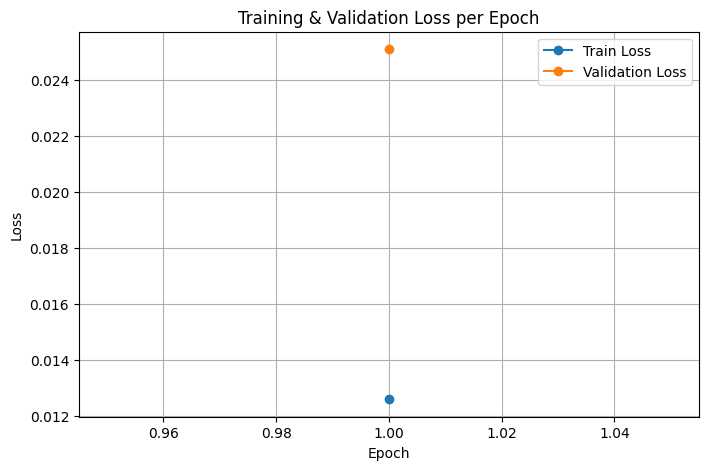


=== Epoch Loss Summary ===
 Epoch  Train Loss  Validation Loss
     1      0.0126           0.0251

üìÅ Saved training log: /content/drive/My Drive/SSAFY/A123/qwen3_vl_4B_smy/training_log.csv


In [22]:
# ============================================
# üöÄ Full Training Loop with Validation & Graph + CSV Log
# ============================================

from tqdm.auto import tqdm
import math, torch
from torch.nn.utils import clip_grad_norm_
import matplotlib.pyplot as plt
import pandas as pd
import os

# ---- ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ----
EPOCHS = 1
PATIENCE = 1        # Í∞úÏÑ†Ïù¥ 2ÏóêÌè≠ Ïó∞ÏÜç ÏóÜÏúºÎ©¥ Ï°∞Í∏∞ Ï¢ÖÎ£å
GRAD_ACCUM = 6
LR = 6e-5

# ---- Í≤ΩÎ°ú ÏÑ§Ï†ï ----
SAVE_DIR = "/content/drive/My Drive/SSAFY/A123/qwen3_vl_4B_smy"
os.makedirs(SAVE_DIR, exist_ok=True)

# ---- ÌôòÍ≤Ω ÏÑ∏ÌåÖ ----
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.benchmark = True
model = model.to(model.device)
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)

num_update_steps_per_epoch = math.ceil(len(train_loader) / GRAD_ACCUM)
num_training_steps = EPOCHS * num_update_steps_per_epoch
num_warmup_steps = max(1, int(num_training_steps * 0.05))

scheduler = get_linear_schedule_with_warmup(
    optimizer, num_warmup_steps=num_warmup_steps, num_training_steps=num_training_steps
)

amp_dtype = torch.bfloat16 if torch.cuda.is_bf16_supported() else torch.float16
scaler = torch.cuda.amp.GradScaler(enabled=True)

# ---- ÌïôÏäµ ÏÉÅÌÉú Î≥ÄÏàò ----
global_step = 0
train_losses, valid_losses = [], []
best_val = float("inf")
no_improve = 0

# ====================================
# üîÅ ÌïôÏäµ Î£®ÌîÑ
# ====================================
for epoch in range(EPOCHS):
    model.train()
    running, total_train_loss = 0.0, 0.0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1} [train]", unit="batch")
    optimizer.zero_grad(set_to_none=True)

    # ----- TRAIN -----
    for step, batch in enumerate(progress_bar, start=1):
        batch = {k: (v.to(model.device) if hasattr(v, "to") else v) for k, v in batch.items()}

        with torch.cuda.amp.autocast(dtype=amp_dtype):
            outputs = model(**batch)
            loss = outputs.loss / GRAD_ACCUM

        scaler.scale(loss).backward()
        running += loss.item()
        total_train_loss += loss.item()

        if step % GRAD_ACCUM == 0:
            scaler.unscale_(optimizer)
            clip_grad_norm_(model.parameters(), max_norm=1.0)
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad(set_to_none=True)
            scheduler.step()
            global_step += 1

            avg_loss = running / GRAD_ACCUM
            progress_bar.set_postfix({"train_loss": f"{avg_loss:.3f}"})
            running = 0.0

    epoch_train_loss = total_train_loss / len(train_loader)
    train_losses.append(epoch_train_loss)

    # ----- VALIDATION -----
    model.eval()
    val_loss, val_steps = 0.0, 0
    with torch.no_grad(), torch.cuda.amp.autocast(dtype=amp_dtype):
        for vb in tqdm(valid_loader, desc=f"Epoch {epoch+1} [valid]", unit="batch"):
            vb = {k: (v.to(model.device) if hasattr(v, "to") else v) for k, v in vb.items()}
            val_loss += model(**vb).loss.item()
            val_steps += 1
    val_avg = val_loss / max(1, val_steps)
    valid_losses.append(val_avg)
    print(f"[Epoch {epoch+1}] train loss {epoch_train_loss:.4f} | valid loss {val_avg:.4f}")

    # ----- BEST MODEL SAVE + EARLY STOPPING -----
    if val_avg < best_val:
        best_val = val_avg
        no_improve = 0
        model.save_pretrained(f"{SAVE_DIR}_best")
        processor.save_pretrained(f"{SAVE_DIR}_best")   # ‚Üê Ïù¥ Ï§Ñ Ï∂îÍ∞Ä
        print(f"‚úÖ Saved new best model (val_loss={val_avg:.4f})")
    else:
        no_improve += 1
        print(f"no improvement: {no_improve}/{PATIENCE}")
        if no_improve >= PATIENCE:
            print("‚èπÔ∏è Early stopping.")
            break

    model.train()

# ====================================
# üß© ÌïôÏäµ Ï¢ÖÎ£å ÌõÑ ÎßàÏßÄÎßâ Î™®Îç∏ Ï†ÄÏû•
# ====================================
model.save_pretrained(f"{SAVE_DIR}_last")
processor.save_pretrained(f"{SAVE_DIR}_last")
print(f"Saved final model at: {SAVE_DIR}_last")

# ====================================
# üìä ÏãúÍ∞ÅÌôî Î∞è Ìëú Ï∂úÎ†•
# ====================================
plt.figure(figsize=(8,5))
plt.plot(range(1, len(train_losses)+1), train_losses, marker='o', label="Train Loss")
plt.plot(range(1, len(valid_losses)+1), valid_losses, marker='o', label="Validation Loss")
plt.title("Training & Validation Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ====================================
# üóÇÔ∏è CSV Î°úÍ∑∏ Ï†ÄÏû•
# ====================================
epoch_data = pd.DataFrame({
    "Epoch": list(range(1, len(valid_losses)+1)),
    "Train Loss": [round(x, 4) for x in train_losses],
    "Validation Loss": [round(x, 4) for x in valid_losses]
})
epoch_data.to_csv(os.path.join(SAVE_DIR, "training_log.csv"), index=False)
print("\n=== Epoch Loss Summary ===")
print(epoch_data.to_string(index=False))
print(f"\nüìÅ Saved training log: {os.path.join(SAVE_DIR, 'training_log.csv')}")


In [23]:

# Î™®Îç∏ Ï†ÄÏû•
# SAVE_DIR = "qwen3_vl_32b_lora_commentLee"
# # LoRA ÏÇ¨Ïö© Ï§ëÏù¥Î©¥: Ïñ¥ÎåëÌÑ∞Îßå Ï†ÄÏû•
# model.save_pretrained(SAVE_DIR)
# processor.save_pretrained(SAVE_DIR)
# print("Saved:", SAVE_DIR)


# inference

30Î∂Ñ~1ÏãúÍ∞Ñ ÏÜåÏöî

#### Ïã§Ïäµ Ï∞∏Í≥† ÎÇ¥Ïö©

    Ï±ïÌÑ∞4-1 RAG Í∏∞Î∞ò Customer Service AI ÏóêÏù¥Ï†ÑÌä∏ Í∞úÎ∞ú
    - Îç∞Ïù¥ÌÑ∞ ÌååÏÑú : langchain_core.output_parsers(), StrOutputParser()

    Ï±ïÌÑ∞ 3-1 Transfer Learning Í∏∞Î∞òÏùò CNN Î™®Îç∏ ÌïôÏäµ
    - ÌïôÏäµ Î£®ÌîÑ : Î¨∏Ï†ú 6: Î™®Îç∏ ÌïôÏäµÏùÑ ÏúÑÌïú Î∞òÎ≥µÎ¨∏
    - Ï∂îÎ°† : with torch.no_grad(), model.eval()

In [24]:
# ============================================
# ‚úÖ Í∏∞Ï°¥ Ï∂îÎ°† ÏΩîÎìúÎ•º ÏµúÎåÄÌïú Ïú†ÏßÄ + (BEST Î™®Îç∏ Î°úÎìú, Ï†ÄÏû• Í≤ΩÎ°úÎßå ÏàòÏ†ï)
# ============================================
import os, re, torch
import pandas as pd
from tqdm.auto import tqdm
from PIL import Image
from transformers import AutoProcessor, Qwen3VLForConditionalGeneration

# --- Ï†ÄÏû• Í≤ΩÎ°ú ÏÑ§Ï†ï (ÌïôÏäµ Îïå Ïì∞Îçò SAVE_DIRÍ≥º ÎèôÏùºÌïòÍ≤å) ---
SAVE_DIR = "/content/drive/My Drive/SSAFY/A123/qwen3_vl_4B_smy"  # <- ÎÑ§Í∞Ä Ïì∞Îçò Í≤ΩÎ°ú
MODEL_DIR = f"{SAVE_DIR}_best"  # Î≤†Ïä§Ìä∏ Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏ ÏÇ¨Ïö©
os.makedirs(SAVE_DIR, exist_ok=True)

# --- BEST Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏ Î°úÎìú ---
if not os.path.isdir(MODEL_DIR):
    raise FileNotFoundError(f"BEST Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏ Ìè¥ÎçîÍ∞Ä ÏóÜÏäµÎãàÎã§: {MODEL_DIR}\n"
                            f"ÌïôÏäµ Ïãú {MODEL_DIR}Í∞Ä Ï†ÄÏû•ÎêòÏóàÎäîÏßÄ ÌôïÏù∏ÌïòÏÑ∏Ïöî.")
model = Qwen3VLForConditionalGeneration.from_pretrained(
    MODEL_DIR, device_map="auto", trust_remote_code=True
).eval()

processor = AutoProcessor.from_pretrained(MODEL_DIR)

# pad_token ÏïàÏ†Ñ ÏÑ§Ï†ï (Í≤ΩÍ≥† Î∞©ÏßÄÏö©)
if processor.tokenizer.pad_token_id is None:
    processor.tokenizer.pad_token_id = processor.tokenizer.eos_token_id

# --------------------------------------------
# (ÏïÑÎûòÎ∂ÄÌÑ∞Îäî ÎÑ§Í∞Ä Ïì∞Îçò ÏΩîÎìú Í∑∏ÎåÄÎ°ú Ïú†ÏßÄ)
# Îç∞Ïù¥ÌÑ∞ ÌååÏÑú : Î™®Îç∏Ïùò ÏùëÎãµÏóêÏÑú ÏÑ†ÏßÄÎ•º Ï∂îÏ∂ú
# --------------------------------------------
import re

def extract_choice(text: str) -> str:
    if not text:
        return "a"
    text = text.strip().lower()

    # Í∞ÄÏû• Î®ºÏ†Ä Ï†ïÌôïÌûà a/b/c/d Îã®ÎèÖ ÌÜ†ÌÅ∞ Îß§Ïπ≠
    m = re.search(r'\b([abcd])\b', text)
    if m:
        return m.group(1)

    # Í¥ÑÌò∏/ÏΩúÎ°†/Îã´ÌûòÍ∏∞Ìò∏Í∞Ä Î∂ôÏùÄ ÌòïÌÉúÍπåÏßÄ ÌóàÏö©: (a), a), a:, - a
    m = re.search(r'[\(\[\{<\s\-:]*([abcd])[\)\]\}>:.,\s]*$', text)
    if m:
        return m.group(1)

    # ÎßàÏßÄÎßâ ÎùºÏù∏/ÌÜ†ÌÅ∞ÏóêÏÑú Îã§Ïãú Ìïú Î≤à ÏïàÏ†Ñ Í≤ÄÏÉâ
    lines = [l.strip() for l in text.splitlines() if l.strip()]
    if lines:
        last = lines[-1]
        m = re.search(r'\b([abcd])\b', last)
        if m:
            return m.group(1)
        for tok in last.split():
            if tok in ("a","b","c","d"):
                return tok

    return "a"  # ÏµúÌõÑÏùò ÏïàÏ†ÑÏû•Ïπò

# Ï∂îÎ°†ÏùÑ ÏúÑÌï¥ Î™®Îì† Î†àÏù¥Ïñ¥ ÌôúÏÑ±Ìôî
model.eval()
preds = []

# (ÏÑ†ÌÉù) pad_token ÏÑ§Ï†ï: Í≤ΩÍ≥† Î∞©ÏßÄÏö© ‚Äî Í∏∞Ï°¥ ÎèôÏûëÏóî ÏòÅÌñ• ÏóÜÏùå
if processor.tokenizer.pad_token_id is None:
    processor.tokenizer.pad_token_id = processor.tokenizer.eos_token_id

for i in tqdm(range(len(test_df)), desc="Inference", unit="sample"):
    row = test_df.iloc[i]
    img = Image.open(row["path"]).convert("RGB")
    user_text = build_mc_prompt(row["question"], row["a"], row["b"], row["c"], row["d"])

    messages = [
        {"role":"system","content":[{"type":"text","text":SYSTEM_INSTRUCT}]},
        {"role":"user","content":[
            {"type":"image","image":img},
            {"type":"text","text":user_text}
        ]},
    ]

    # ÌÖúÌîåÎ¶ø Ï†ÅÏö©(ÌÜ†ÌÅ¨ÎÇòÏù¥Ï¶àÎäî generateÏóêÏÑú)
    text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
    inputs = processor(text=[text], images=[img], return_tensors="pt").to(device)

    with torch.no_grad():
      out_ids = model.generate(
          **inputs,
          max_new_tokens=2,          # ÏõêÎûò Í∞í Ïú†ÏßÄ(ÏõêÌïòÏãúÎ©¥ 1Î°ú Ï§ÑÏó¨ÎèÑ Îê®)
          do_sample=False,
          eos_token_id=processor.tokenizer.eos_token_id,
      )

    # üîß ÏûÖÎ†• Í∏∏Ïù¥ Ïù¥ÌõÑ(Ïã†Í∑ú ÌÜ†ÌÅ∞)Îßå Ïä¨ÎùºÏù¥Ïä§
    gen_part = out_ids[:, inputs["input_ids"].shape[1]:]
    output_text = processor.batch_decode(
        gen_part, skip_special_tokens=True, clean_up_tokenization_spaces=False
    )[0]

    choice = extract_choice(output_text)
    # Ï≤òÏùå ÌÖåÏä§Ìä∏Ìï†ÎïåÎäî Ï£ºÏÑùÌï¥Ï†úÌï¥ÏÑú ÏùëÎãµÏ†úÎåÄÎ°úÎÇòÏò§ÎäîÏßÄ ÌôïÏù∏
    # print(f"[{i}] output_text:", repr(output_text))
    # print(f"[{i}] extract_choice:", choice)
    preds.append(choice)


# Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ± (üëâ SAVE_DIR Î∞ëÏúºÎ°ú Ï†ÄÏû•)
submission = pd.DataFrame({"id": test_df["id"], "answer": preds})
sub_path = os.path.join(SAVE_DIR, "submission.csv")
submission.to_csv(sub_path, index=False)
print(f"Saved submission.csv -> {sub_path}")

# ===== abcd ÏÑ†ÌÉù ÌöüÏàò Ï∂úÎ†• =====
print("\n--- ÏÑ†ÌÉùÏßÄÎ≥Ñ ÏùëÎãµ ÌöüÏàò ---")
# .sort_index()Î•º ÏÇ¨Ïö©ÌïòÎ©¥ a, b, c, d ÏàúÏÑúÎ°ú Ï†ïÎ†¨ÎêòÏñ¥ ÎÇòÏòµÎãàÎã§.
print(submission["answer"].value_counts().sort_index())
# ========================================================


Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Inference:   0%|          | 0/3887 [00:00<?, ?sample/s]

The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Saved submission.csv -> /content/drive/My Drive/SSAFY/A123/qwen3_vl_4B_smy/submission.csv

--- ÏÑ†ÌÉùÏßÄÎ≥Ñ ÏùëÎãµ ÌöüÏàò ---
answer
a    995
b    944
c    985
d    963
Name: count, dtype: int64


In [25]:
# Î™®Îç∏ ÏùëÎãµ ÏòàÏãú
print(output_text)

c


## Í≤ÄÏ¶ùÏÖãÏóê ÎåÄÌïú ÌòºÎèôÌñâÎ†¨

Validation Analysis: 0it [00:00, ?it/s]

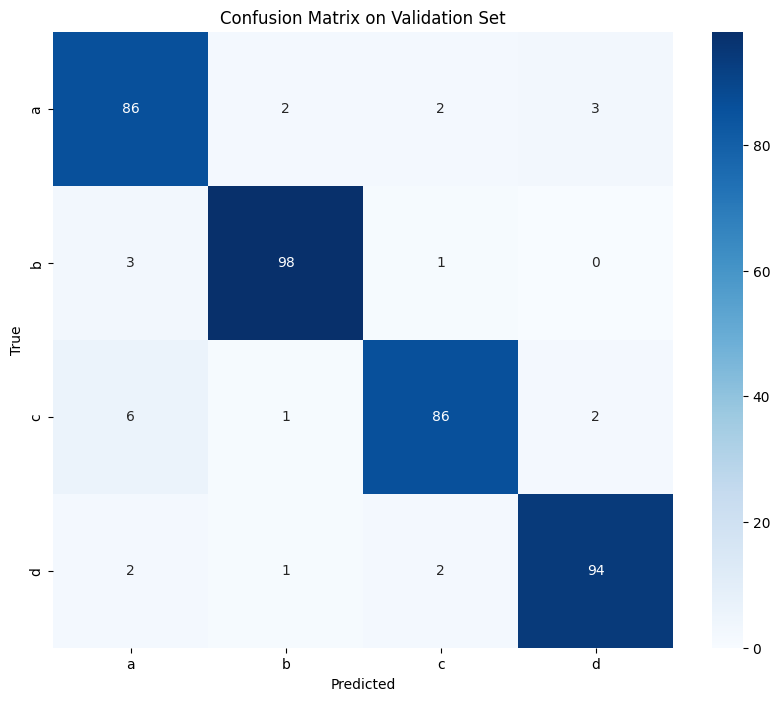


Classification Report:
              precision    recall  f1-score   support

           a       0.89      0.92      0.91        93
           b       0.96      0.96      0.96       102
           c       0.95      0.91      0.92        95
           d       0.95      0.95      0.95        99

    accuracy                           0.94       389
   macro avg       0.94      0.94      0.94       389
weighted avg       0.94      0.94      0.94       389


=== Error Pattern Analysis ===

Q: Ïù¥ ÌïúÏãù ÏÑ∏Ìä∏ Î©îÎâ¥Ïóê Ìè¨Ìï®ÎêòÏßÄ ÏïäÏùÄ ÏùåÏãùÏùÄ Î¨¥ÏóáÏù∏Í∞ÄÏöî?
True: c, Predicted: a

Q: Ïù¥ ÏùåÏãù ÏÑ∏Ìä∏Ïóê Ìè¨Ìï®ÎêòÏßÄ ÏïäÏùÄ Í≤ÉÏùÄ Î¨¥ÏóáÏù∏Í∞ÄÏöî?
True: c, Predicted: a

Q: Ïù¥ Í≥®Î™©Í∏∏ÏóêÏÑú Î≥º Ïàò ÏóÜÎäî Í≤ÉÏùÄ Î¨¥ÏóáÏù∏Í∞ÄÏöî?
True: a, Predicted: c

Q: Ïù¥ ÏùåÏãù ÏÑ∏Ìä∏ Ï§ëÏóêÏÑú Íµ≠Î¨º ÏöîÎ¶¨Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî?
True: a, Predicted: b

Q: Ïù¥ ÏÇ¨ÏßÑÏóêÏÑú Í∏∞Î¶∞ÏóêÍ≤å Î®πÏù¥Î•º Ï£ºÍ∏∞ ÏúÑÌï¥ ÏÇ¨Ïö©Îêú ÎèÑÍµ¨Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî?
True: c, Predicted: d


In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_predictions(valid_subset, model, processor, device="cuda"):
    true_labels = []
    pred_labels = []

    model.eval()
    for i, row in tqdm(valid_subset.iterrows(), desc="Validation Analysis"):
        # Ïã§Ï†ú ÎùºÎ≤® Ï†ÄÏû•
        true_labels.append(row["answer"])

        # ÏòàÏ∏° ÏàòÌñâ
        img = Image.open(row["path"]).convert("RGB")
        user_text = build_mc_prompt(row["question"], row["a"], row["b"], row["c"], row["d"])

        messages = [
            {"role":"system", "content":[{"type":"text", "text":SYSTEM_INSTRUCT}]},
            {"role":"user", "content":[
                {"type":"image", "image":img},
                {"type":"text", "text":user_text}
            ]},
        ]

        text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
        inputs = processor(text=[text], images=[img], return_tensors="pt").to(device)

        with torch.no_grad():
            out_ids = model.generate(**inputs, max_new_tokens=2)
            gen_part = out_ids[:, inputs["input_ids"].shape[1]:]
            output_text = processor.batch_decode(gen_part, skip_special_tokens=True)[0]
            pred = extract_choice(output_text)
            pred_labels.append(pred)

    # ÌòºÎèô ÌñâÎ†¨ ÏÉùÏÑ±
    cm = confusion_matrix(true_labels, pred_labels, labels=['a', 'b', 'c', 'd'])

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['a', 'b', 'c', 'd'],
                yticklabels=['a', 'b', 'c', 'd'])
    plt.title('Confusion Matrix on Validation Set')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # ÏÉÅÏÑ∏ Î©îÌä∏Î¶≠ Ï∂úÎ†•
    print("\nClassification Report:")
    print(classification_report(true_labels, pred_labels))

    # Ïò§Îãµ Î∂ÑÏÑù
    error_cases = []
    for i, (true, pred) in enumerate(zip(true_labels, pred_labels)):
        if true != pred:
            error_cases.append({
                'idx': valid_subset.index[i],
                'question': valid_subset.iloc[i]['question'],
                'true': true,
                'pred': pred
            })

    return error_cases

# Ïã§Ìñâ
error_cases = analyze_predictions(valid_subset, model, processor)

# Ïò§Îãµ Ìå®ÌÑ¥ Î∂ÑÏÑù
print("\n=== Error Pattern Analysis ===")
for case in error_cases[:5]:  # Ï≤´ 5Í∞ú Ïò§Îãµ ÏºÄÏù¥Ïä§Îßå Ï∂úÎ†•
    print(f"\nQ: {case['question']}")
    print(f"True: {case['true']}, Predicted: {case['pred']}")